In [ ]:
import pandas as pd
from scipy import stats

In [ ]:
data = pd.read_csv("modified_c4_epa_air_quality.csv")
# removing NaN values
data = data.dropna()

In [ ]:
data.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294


<Axes: >

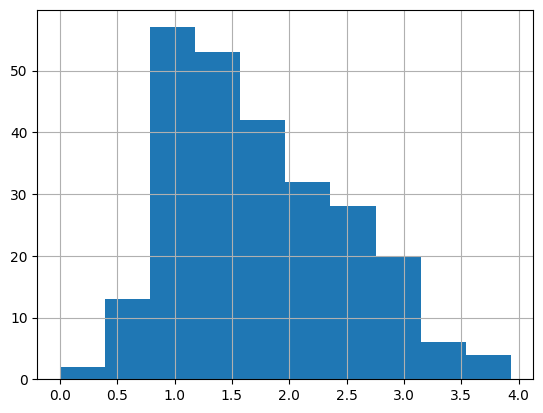

In [ ]:
data["aqi_log"].hist()

In [ ]:
mean_aqi_log = data["aqi_log"].mean()
mean_aqi_log

np.float64(1.7689182585091165)

In [ ]:
std_aqi_log = data["aqi_log"].std()
std_aqi_log

np.float64(0.7164977499700741)

In [ ]:
lower_limit = mean_aqi_log - 1 * std_aqi_log
upper_limit = mean_aqi_log + 1 * std_aqi_log

print("1SD lower limit: ", lower_limit)
print("1SD upper limit:", upper_limit)

1SD lower limit:  1.0524205085390426
1SD upper limit: 2.4854160084791905


In [ ]:
print("Should be around 64% to be normal distribution: ", ((data["aqi_log"] >= lower_limit) & (data["aqi_log"] <= upper_limit)).mean())

Should be around 64% to be normal distribution:  0.7898832684824902


In [ ]:
lower_limit = mean_aqi_log - 2 * std_aqi_log
upper_limit = mean_aqi_log + 2 * std_aqi_log

print("2SD lower limit: ", lower_limit)
print("2SD upper limit:", upper_limit)

2SD lower limit:  0.33592275856896836
2SD upper limit: 3.2019137584492645


In [ ]:
print("Should be around 92% to be normal distribution: ", ((data["aqi_log"] >= lower_limit) & (data["aqi_log"] <= upper_limit)).mean())

Should be around 92% to be normal distribution:  0.9571984435797666


In [ ]:
lower_limit = mean_aqi_log - 3 * std_aqi_log
upper_limit = mean_aqi_log + 3 * std_aqi_log

print("3SD lower limit: ", lower_limit)
print("3SD upper limit:", upper_limit)

3SD lower limit:  -0.38057499140110584
3SD upper limit: 3.918411508419339


In [ ]:
print(
    "Should be around 96% to be normal distribution: ",
    ((data["aqi_log"] >= lower_limit) & (data["aqi_log"] <= upper_limit)).mean(),
)

Should be around 96% to be normal distribution:  0.9961089494163424


In [ ]:
# z score is basically the standard deviation value to check outliers, so if it's less than -3 and more than +3 SD then they are outliers
data["Z_SCORE"] = stats.zscore(data["aqi_log"])
data.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,Z_SCORE
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442,0.434236
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759,0.031941
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612,-0.937357
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294,-0.535062
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294,-0.535062


In [ ]:
data[(data["Z_SCORE"] > 3) | (data["Z_SCORE"] < -3)]

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,Z_SCORE
244,2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,3.931826,3.024612


In [ ]:
# Here Arizona is the outliere with too high of api log